<a href="https://colab.research.google.com/github/biotrain-latam/BiotrAIn-pilot-course/blob/main/BiotrAIn_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 3 - Classification

### Definition

Classification is a fundamental task in machine learning that falls under the category of supervised learning. It involves training a model to assign input data to one of several predefined categories or classes based on labeled examples. The model learns from historical data and uses this knowledge to predict the class of new, unseen instances.

In machine learning, classification is the process of predicting a categorical label for a given input. The categories are discrete and predefined, such as “spam” or “not spam,” “disease” or “no disease,” or “cat,” “dog,” or “bird.” The goal is to create a model that accurately assigns class labels to new data based on what it has learned from a training set.

### Examples
Classification is widely used across various domains. For example:

In email spam detection, the model classifies an incoming email as either “spam” or “not spam” based on its content and metadata.

In medical diagnosis, a system might classify a patient as having “Disease A,” “Disease B,” or “No disease” based on lab test results.

In image recognition, a model may categorize an image as depicting a dog, a cat, or a bird based on pixel data.

### Types of Classification
Classification tasks can be divided into several types:

* Binary Classification: The model predicts one of two possible outcomes. Examples include determining whether a transaction is fraudulent or not, or whether a tumor is malignant or benign.

* Multiclass Classification: The model selects one category from three or more possible options. For instance, classifying types of flowers such as setosa, versicolor, or virginica.

* Multilabel Classification: The model assigns multiple labels to a single instance. For example, an image might be labeled as both “beach” and “sunset.”

### How It Works
The classification process typically consists of two phases:

* Training Phase: The model is fed a dataset that includes input features and their corresponding class labels. It learns patterns and relationships in the data to distinguish between different categories.

* Prediction Phase: The trained model is used to predict the class label for new data based on the patterns it learned during training.

### Common Classification Algorithms
Several algorithms are commonly used for classification tasks:

* Logistic Regression: A statistical model that uses a logistic function to model binary outcomes.

* Decision Trees: Models that use a tree-like structure of decisions based on feature values.

* Random Forest: An ensemble method that builds multiple decision trees and merges their predictions.

* Support Vector Machines (SVM): Models that find the best boundary (hyperplane) to separate classes.

* k-Nearest Neighbors (KNN): A simple algorithm that classifies based on the most common class among the k closest data points.

* Naive Bayes: A probabilistic classifier based on Bayes’ theorem with the assumption of feature independence.

* Neural Networks: Complex models inspired by the human brain, capable of capturing nonlinear relationships in data.

### Evaluation Metrics
To assess the performance of a classification model, several metrics are commonly used:

* Accuracy: The proportion of correctly predicted instances out of the total.

* Precision: The proportion of true positive predictions among all positive predictions.

* Recall: The proportion of true positives correctly identified out of all actual positives.

* F1 Score: The harmonic mean of precision and recall, useful when the class distribution is imbalanced.

* Confusion Matrix: A table that summarizes the performance of a classification model by showing the counts of true positives, false positives, true negatives, and false negatives.

* Kappa (Cohen’s Kappa): measures how well a classification model’s predictions agree with the true labels, accounting for agreement by chance, making it useful especially with imbalanced data.

* Receiver Operating Characteristic (ROC) curve: The ROC curve plots the trade-off between true positive rate and false positive rate across thresholds, with the area under the curve (AUC) indicating the model’s overall ability to distinguish between classes.



In summary, classification is a core task in machine learning that enables systems to make decisions and predictions based on labeled data. By learning from examples, classification models can be applied in a wide range of applications, including medical diagnosis, fraud detection, image and speech recognition, and natural language processing. Understanding the types of classification problems, the algorithms used to solve them, and the metrics for evaluating them is essential for anyone working in data science or applied machine learning.

# Analysis in R
The session we will work on is a single one and will be based on analyses conducted in the R software. We will start by installing the required packages.

In [ ]:
# Installing necessary packages
install.packages("caret", dependencies = TRUE)
install.packages("ROCR")
install.packages("ggfortify")

# Load libraries
library(caret)
library(ROCR)
library(ggfortify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Classification methods to study the perturbome

In this classification tutorial, we will explore several model training/testing methods using supervised learning algorithms. Analyses are based on the work: https://www.sciencedirect.com/science/article/pii/S0303264721000666

The example we will analyze is based on the concept of "perturbome", which refers to the molecular response that organisms exhibit when exposed to different stress conditions or perturbations. In the figure (A), this concept is represented. Although there is a specific molecular response for each type of disturbance, it has been determined that a set of genes, metabolic pathways, and molecular networks respond in a common way to various stress conditions. This suggests that these elements may be essential for ensuring survival under such conditions.

Functional analyses of these common elements often associate them with responses to DNA damage, a reduction in the synthesis of biomolecules, RNA degradation, and the modulation of protein and DNA degradation, among other processes. All of these mechanisms appear to be related to the organism’s ability to survive stressful situations.

![perturbome.jpg](https://ars.els-cdn.com/content/image/1-s2.0-S0303264721000666-gr1_lrg.jpg)

The data to be analyzed in this tutorial come from a study conducted using the bacterial model *Pseudomonas aeruginosa*, based on gene expression data obtained through microarrays. These are public datasets that were consolidated in a publication that evaluated different data partitioning strategies and classification algorithms.
In the figure (B), the general pipeline for identifying core response genes in *P. aeruginosa* by a machine learning approach is presented, including the single-partition (SP) and multiple-partition (MP) methods, which resulted in 6 general strategies (2 methods vrs 3 classifiers). A portion of these analysis, onnly the SP method (with 3 classifiers), will be used in this tutorial to illustrate the analysis methods.


## Experimental design

The dataset consists of samples from both control and perturbed conditions. Control samples correspond to *P. aeruginosa* grown under normal conditions without exposure to any stress or perturbation, while the perturbed samples involve the bacterium exposed to various stressors such as antibiotics, chemical compounds, or physical stress.

For each experimental condition—both control and perturbed—microarray analyses were performed to measure gene expression changes across more than 5,000 genes. The data were normalized using a method called RMA (Robust Multi-array Average), which will not be covered in this tutorial. The resulting dataset contains gene expression levels for over 5,000 genes, along with a label indicating whether each sample corresponds to a control or perturbed condition. The comparison of samples by global profiles with transcriptomic data of 5549 genes of* P. aeruginosa* are presented in the figure: (A) Dispersion of intensities of samples, showing similar distribution between samples after normalization. (B) Global profiles of samples were compared by PCA, using all the 5549 genes in the microarray.

![methods.jpg](https://ars.els-cdn.com/content/image/1-s2.0-S0303264721000666-gr3_lrg.jpg)



In the original published study, various data partitioning strategies were evaluated; however, this aspect will not be covered in this version of the tutorial due to time constraints. Instead, we will use a simple partitioning method, in which a specific portion of the dataset is allocated for training and another for testing. The following figure provides a general representation of the methods used in the original scientific study, including: (A) Microarray-data selection in GEO-NCBI database according to experimental design. (B) Samples, including replicates in each experiment -perturbation and control-, were separated into the training or the testing data sets using the SP (the last replicate of each condition was moved to the testing dataset) or MP (random separation with multiple arrangements) methods. (C) Representation of classification procedures for the SP and MP methods, including internal 10-fold cross-validation for the training data set.


![methods.jpg](https://ars.els-cdn.com/content/image/1-s2.0-S0303264721000666-gr2_lrg.jpg)


The goal of this tutorial is to determine, using classification algorithms, whether it is possible to distinguish between control and perturbed conditions based on gene expression profiles. We will first use the complete set of genes to build classification models, and then apply feature selection methods to identify the subset of genes that are most informative for distinguishing between the two conditions. These genes will be considered as potential molecular markers involved in the bacterial stress response.

Classification algorithms will be applied both before and after dimensionality reduction in order to assess how reducing the number of features affects model performance. More importantly, this process will help identify the key elements that constitute the bacterium’s generalized molecular response to stress.

Best practices in this type of analysis include splitting the dataset into training and testing sets, performing cross-validation, and evaluating multiple classification algorithms. In this tutorial, we will focus on three algorithms: Support Vector Machines (SVM), Random Forest (RF), and k-Nearest Neighbors (KNN). Feature selection will be performed using importance measures, and the test results will be evaluated not only using traditional metrics, but also through performance curves such as ROC curves. Finally, we will explore the annotation of selected genes and their potential visualization in molecular interaction networks.




# Analysis

In [ ]:
# Load data
datos<-read.csv("datos-clasificacion.csv")

# Display the first 4 rows and the last 5 columns
datos[1:4,5545:5550]

,PA5567_at,PA5568_at,PA5569_rnpA_at,PA5570_rpmH_at,Class,Role
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0.5078844,2.4513798,3.507884,3.743101,Control,training
2,0.2769070,0.9554162,1.561129,1.530477,Perturbation,training
3,0.3173572,3.4134850,6.953425,3.780937,Control,training
4,0.4105653,4.3830707,8.193698,4.585110,Control,training


In [ ]:
# Verify that the data type of the last two columns is factor, using class().
# If necessary, reassign the category. Verify with levels().
class(datos$Role)
datos$Role<-as.factor(datos$Role)
levels(datos$Role)

datos$Class<-as.factor(datos$Class)
levels(datos$Class)

[1] "character"

[1] "testing"  "training"

[1] "Control"      "Perturbation"

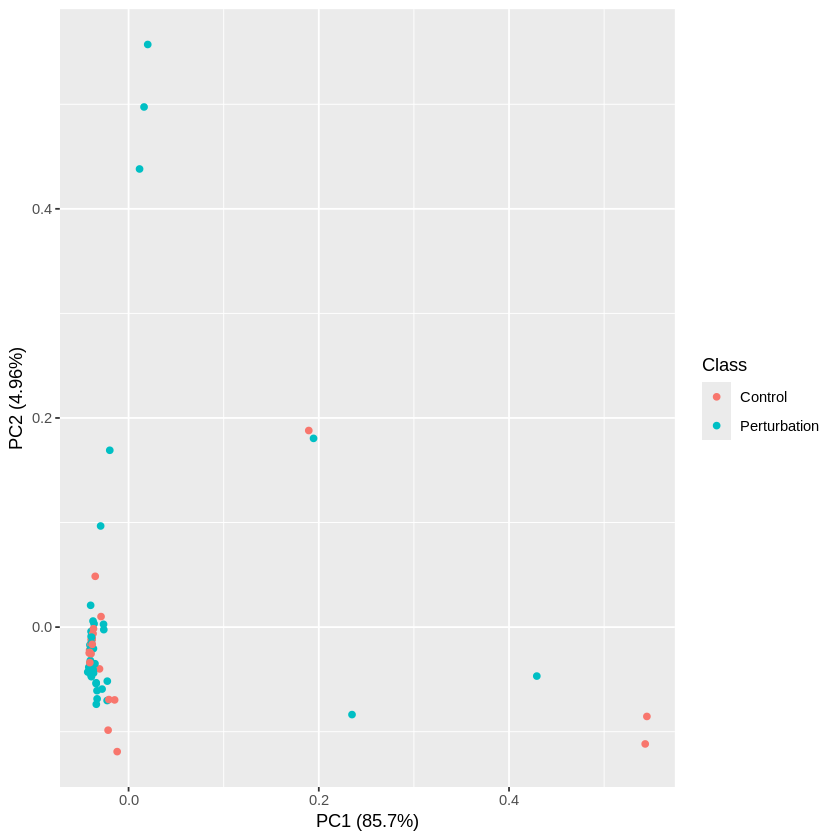

In [ ]:
# Perform a PCA with prcomp() on the numeric data, and
# Visualize and color for class and role with: autoplot(, data = ?, color ="column")
pca<-prcomp(datos[,1:5548])
autoplot(pca, data = datos, colour ="Class")

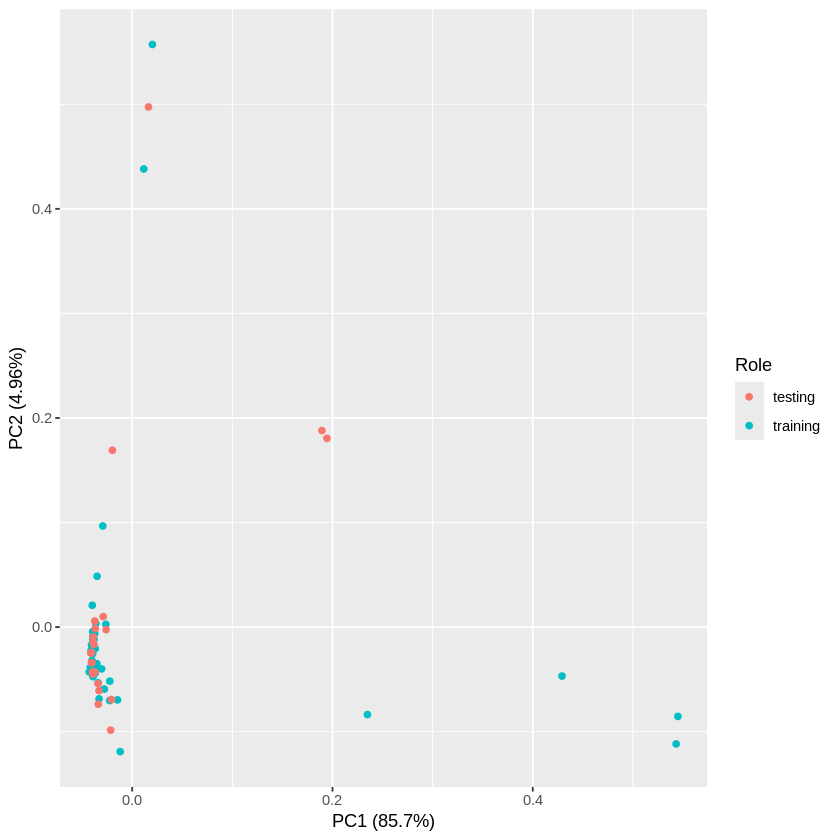

In [ ]:
autoplot(pca, data = datos, colour ="Role")

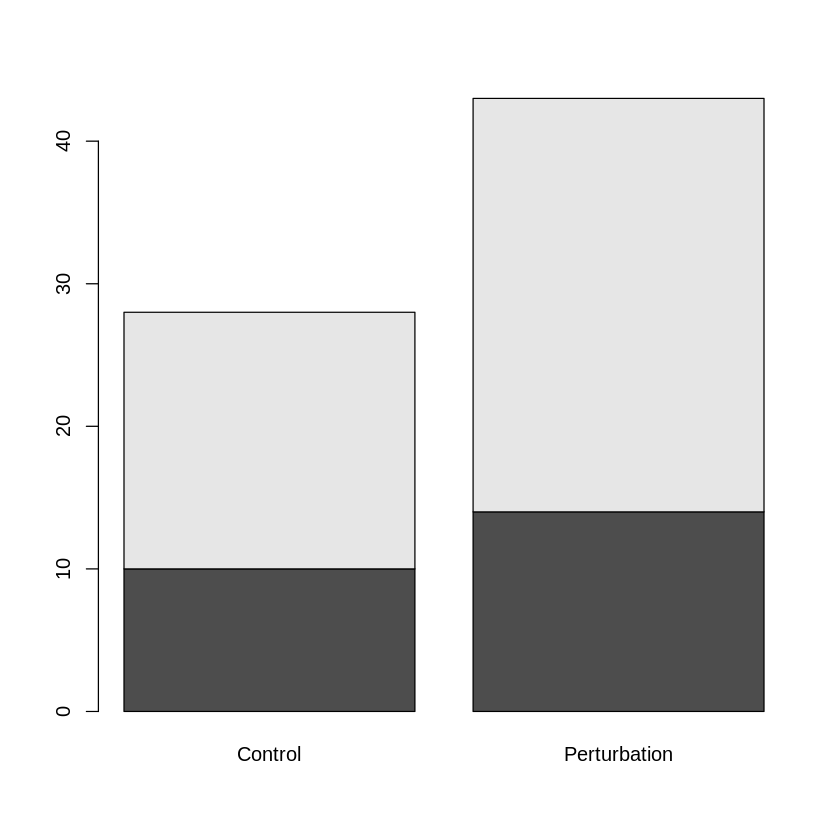

In [ ]:
# Make a barplot with the 2 categorical data. Remember to use a table.
barplot(table(datos$Role,datos$Class))

In [ ]:
# Separate data into "training" and "testing" based on role. Exclude the "Role" column.
training<-datos[datos$Role=="training",1:5549]
testing<-datos[datos$Role=="testing",1:5549]

# Using prop.table(table()) determine the % of each class in each data set
prop.table(table(training$Class))
prop.table(table(testing$Class))


     Control Perturbation 
   0.3829787    0.6170213 


     Control Perturbation 
   0.4166667    0.5833333 

# Classification using Caret

The **caret** package in R, short for *Classification And Regression Training*, is a comprehensive toolset designed to simplify the process of building and evaluating predictive models. It offers a unified interface for training a wide variety of machine learning algorithms—both for classification and regression tasks—while managing common steps such as data preprocessing, feature selection, resampling, and model evaluation.

One of the key strengths of **caret** is its ability to handle data preprocessing tasks like normalization, imputation, and filtering of low-variance features. It also supports a range of resampling techniques, including cross-validation and bootstrapping, which are essential for robust model evaluation. Additionally, caret facilitates hyperparameter tuning through grid search or random search methods.

At the core of the package is the *train()* function, which abstracts the complexities of individual modeling functions, allowing users to switch between different algorithms with minimal code changes. After model training, functions like *predict()* and *confusionMatrix()* help assess performance on new data.

More info: https://topepo.github.io/caret/

### Training

In [ ]:
# Classification Algorithms
# Run the commands to define the internal 10-fold CV training method
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

# Run each algorithm, indicating each method: "knn", "svmRadial", "rf"
# fit.MODEL <- train(Class~., data=training, method="?", metric=metric, trControl=control)

# kNN
fit.knn <- train(Class~., data=training, method="knn", metric=metric, trControl=control)
# SVM
fit.svm <- train(Class~., data=training, method="svmRadial", metric=metric, trControl=control)
# Random Forest
fit.rf <- train(Class~., data=training, method="rf", metric=metric, trControl=control)


Call:
summary.resamples(object = results)

Models: KNN, SVM, RF 
Number of resamples: 10 

Accuracy 
    Min. 1st Qu. Median  Mean 3rd Qu. Max. NA's
KNN  0.4     0.6  0.750 0.705  0.7875    1    0
SVM  0.5     0.6  0.700 0.720  0.8000    1    0
RF   0.5     0.6  0.675 0.725  0.8000    1    0

Kappa 
          Min.   1st Qu.     Median      Mean   3rd Qu. Max. NA's
KNN -0.3636364 0.1666667 0.50000000 0.3630536 0.5340909    1    0
SVM -0.3333333 0.0000000 0.27272727 0.3303030 0.5454545    1    0
RF  -0.3333333 0.0000000 0.08333333 0.2924242 0.5454545    1    0


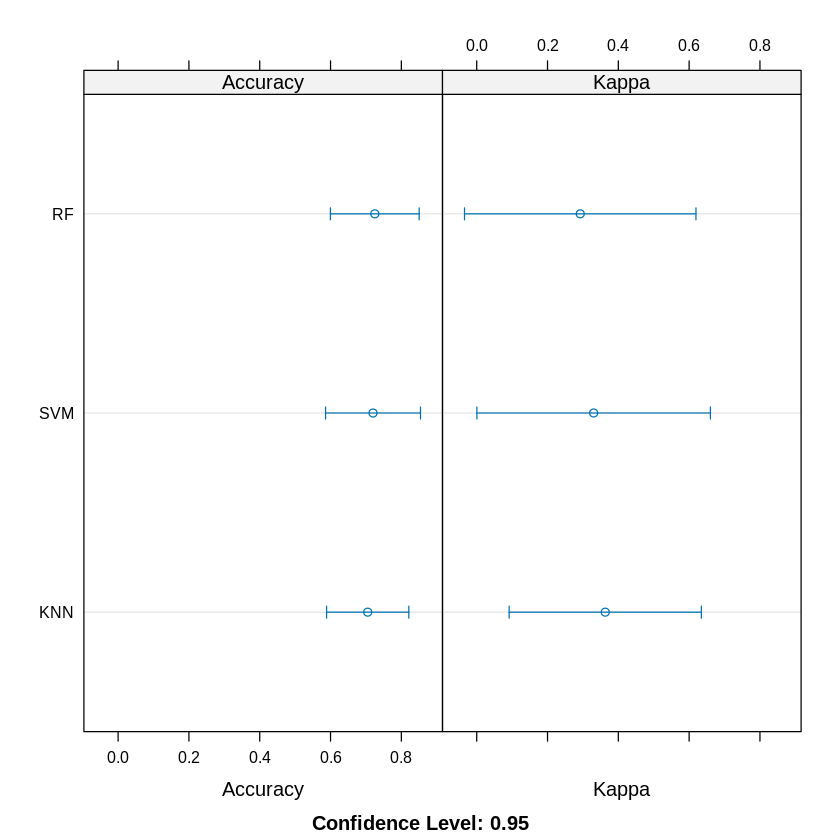

In [ ]:
# Run the following code to compare results.
results <- resamples(list(KNN=fit.knn, SVM=fit.svm, RF=fit.rf))
summary(results)
dotplot(results)

# Feature selection

,Overall
,<dbl>
PA0001_dnaA_at,10.626354
PA0002_dnaN_at,0.000000
PA0003_recF_at,33.976367
PA0004_gyrB_at,25.139198
PA0005_at,0.000000
PA0006_at,0.000000
PA0007_at,0.000000
PA0008_glyS_at,0.000000
PA0009_glyQ_at,0.000000


rf variable importance

  only 20 most important variables shown (out of 5548)

                 Overall
PA4265_tufA_s_at  100.00
PA1585_sucA_at     83.39
PA0500_bioB_at     80.39
PA1054_at          79.34
PA5051_argS_at     79.28
PA1589_sucD_at     79.14
PA4455_at          78.37
PA4967_parE_at     77.48
PA4889_at          69.84
PA2640_nuoE_at     68.55
PA2959_at          66.98
PA2715_at          66.85
PA2967_fabG_at     66.70
PA3527_pyrC_at     66.65
PA2744_thrS_at     66.63
PA4424_at          65.20
PA3150_wbpG_at     64.56
PA5052_at          63.63
PA2648_nuoM_at     62.80
PA4243_secY_at     62.53


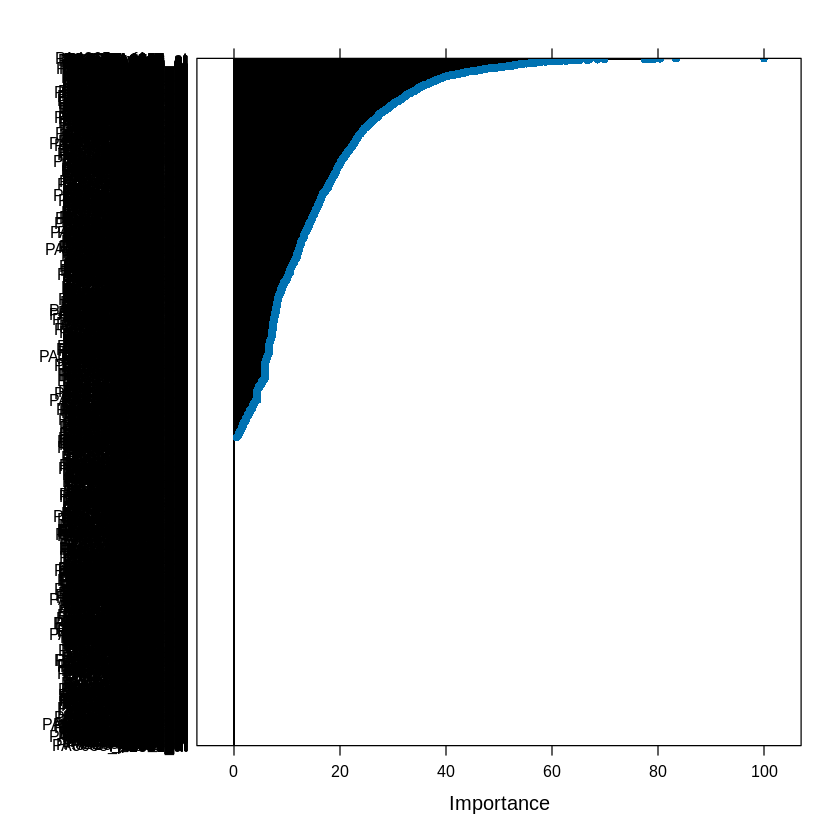

In [ ]:
# Importance Metric for RF
# Calculate attribute importance with: importance < - varImp(selectedModel)
# Use the head(), print(), and plot() functions to explore
importance <- varImp(fit.rf)
head(importance)
print(importance)
plot(importance)

In [ ]:
# Run the following command to sort by "importance"
IndexRank <-data.frame(sort(importance$importance$Overall, index.return = TRUE, decreasing = TRUE)[2])
#For SMV and KNN importance$importance$Control, for RF/cart use $Overall (RF only with Overall)
Ranking<-t(IndexRank)

# Create two datasets named "trainingrank", "testingrank", and "datosrank" with the columns sorted by rank.
# training[,c(Ranking,5549)]; similar for testing and total data.
trainingrank<-training[,c(Ranking,5549)]
testingrank<-testing[,c(Ranking,5549)]
datosrank<-datos[,c(Ranking,5549)]

# Assign a value of k=? and select a top k number of variables with the highest importance.
# Create the subsets with the k columns + class with:
# trainingrank.top<-trainingrank[,c(1:k,5549)] and similar for testing and total data

k=30
trainingrank.top<-trainingrank[,c(1:k,5549)]
testingrank.top<-testingrank[,c(1:k,5549)]
datosrank.top<-datosrank[,c(1:k,5549)]

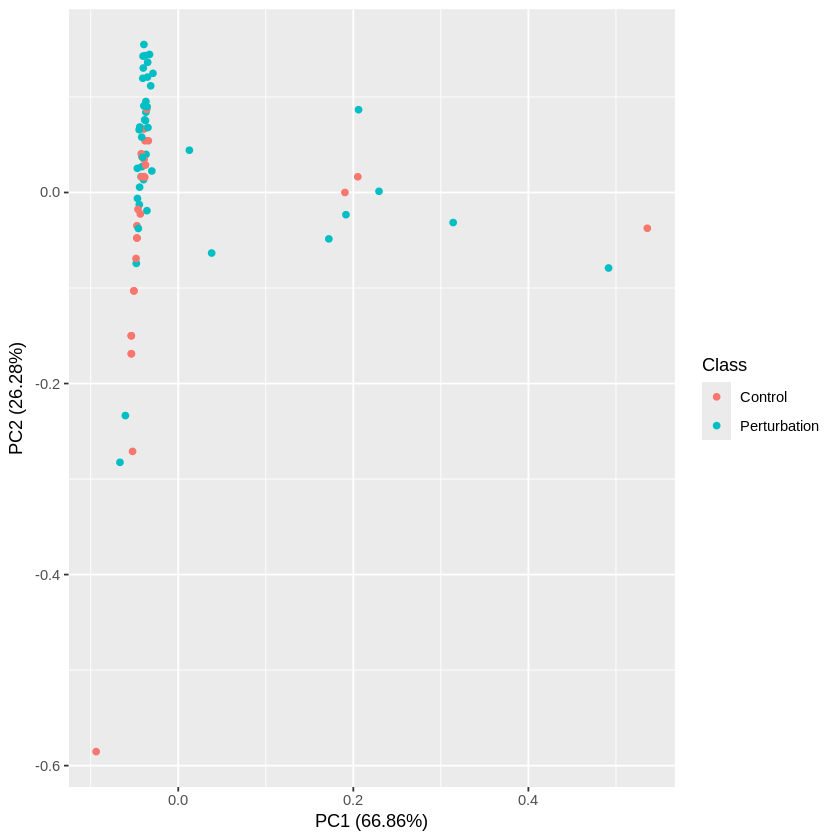

In [ ]:
# Repeat the PCA with numerical data from datosrank.top and color by class
pca<-prcomp(datosrank.top[,1:k])
autoplot(pca, data = datosrank.top, colour ="Class")

In [ ]:
# Verify that the column names of the training and testing topK are the same.
colnames(trainingrank.top)==colnames(testingrank.top)

# Provide the results of "fit.rf"
fit.rf

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE

Random Forest 

  47 samples
5548 predictors
   2 classes: 'Control', 'Perturbation' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 42, 42, 42, 43, 43, ... 
Resampling results across tuning parameters:

  mtry  Accuracy  Kappa    
     2  0.725     0.2924242
   105  0.685     0.2470862
  5548  0.660     0.2137529

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [ ]:
# Perform RF training for top training data by calling the model "fit.rf.top".
fit.rf.top <- train(Class~., data=trainingrank.top, method="rf", metric=metric, trControl=control)
fit.rf.top

Random Forest 

47 samples
30 predictors
 2 classes: 'Control', 'Perturbation' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 42, 43, 42, 42, 42, ... 
Resampling results across tuning parameters:

  mtry  Accuracy  Kappa    
   2    0.715     0.3494172
  16    0.725     0.4257576
  30    0.770     0.5206294

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 30.

,Overall
,<dbl>
PA4265_tufA_s_at,3.1588978
PA1585_sucA_at,2.6510846
PA0500_bioB_at,11.9711441
PA1054_at,15.5184617
PA5051_argS_at,14.7525069
PA1589_sucD_at,1.4095443
PA4455_at,0.9859317
PA4967_parE_at,4.4547959
PA4889_at,3.2161007


rf variable importance

  only 20 most important variables shown (out of 30)

                 Overall
PA2967_fabG_at   100.000
PA1054_at         15.518
PA5051_argS_at    14.753
PA0500_bioB_at    11.971
PA3150_wbpG_at    10.281
PA5052_at          6.468
PA4967_parE_at     4.455
PA4701_at          3.821
PA2744_thrS_at     3.790
PA3866_at          3.666
PA5432_at          3.525
PA4424_at          3.325
PA4889_at          3.216
PA4265_tufA_s_at   3.159
PA4241_rpsM_at     2.918
PA1927_metE_at     2.885
PA1653_at          2.882
PA1585_sucA_at     2.651
PA2648_nuoM_at     2.415
PA2715_at          1.928


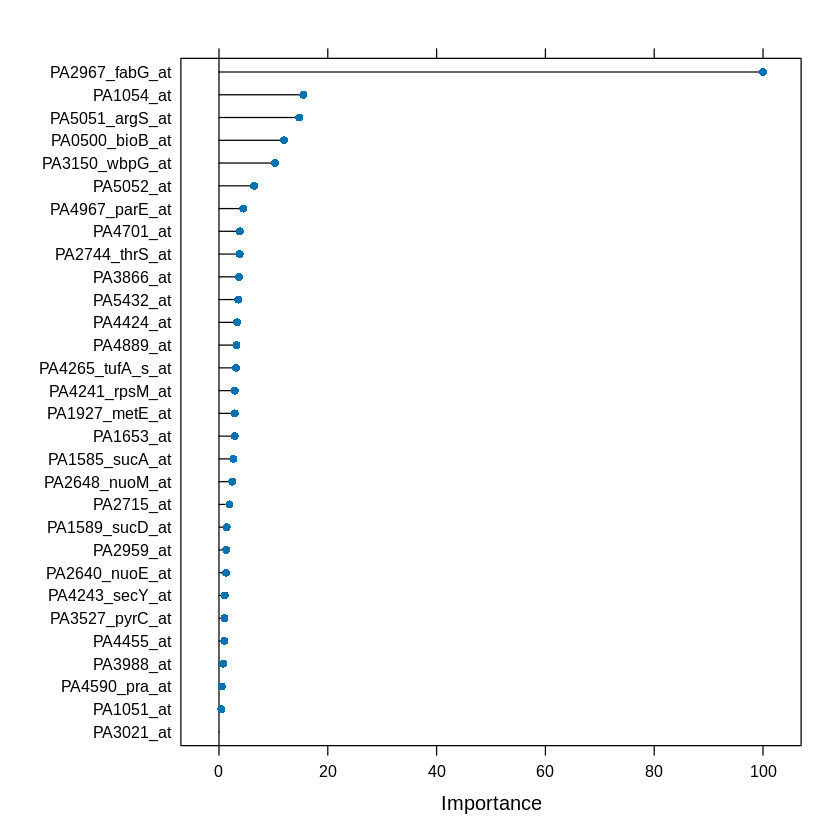

In [ ]:
# Repeat the calculation and exploration of importance with the topk data
importance <- varImp(fit.rf.top)
head(importance)
print(importance)
plot(importance)


Call:
summary.resamples(object = results)

Models: RF.5548.genes, RF.topk.genes 
Number of resamples: 10 

Accuracy 
              Min. 1st Qu. Median  Mean 3rd Qu. Max. NA's
RF.5548.genes  0.5  0.6000  0.675 0.725     0.8    1    0
RF.topk.genes  0.6  0.6375  0.775 0.770     0.8    1    0

Kappa 
                    Min. 1st Qu.     Median      Mean   3rd Qu. Max. NA's
RF.5548.genes -0.3333333    0.00 0.08333333 0.2924242 0.5454545    1    0
RF.topk.genes  0.1666667    0.25 0.52272727 0.5206294 0.5979021    1    0


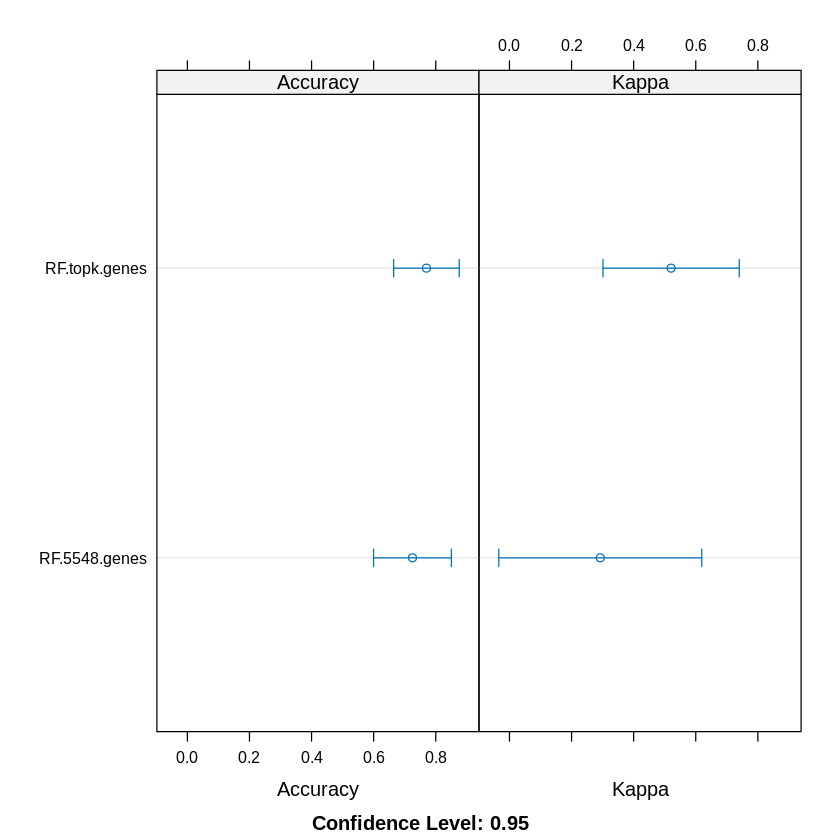

In [ ]:
# Run the following command to compare
results <- resamples(list(RF.5548.genes=fit.rf, RF.topk.genes=fit.rf.top))
summary(results)
dotplot(results)

## Testing



In [ ]:
# Predictions with test set
# Run the following command to analyze the test set with total data
predictions <- predict(fit.rf, testing)
Statistics<-confusionMatrix(predictions, testing$Class)
Statistics$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
    0.75000000     0.43750000     0.53288720     0.90226959     0.58333333 
AccuracyPValue  McnemarPValue 
    0.07095124     0.04122683

In [ ]:
# Similar to the previous step, perform prediction2 for the top data
predictions2 <- predict(fit.rf.top, testingrank.top)
Statistics2<-confusionMatrix(predictions2, testingrank.top$Class)
Statistics2$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
     0.6250000      0.2173913      0.4059364      0.8120071      0.5833333 
AccuracyPValue  McnemarPValue 
     0.4226849      1.0000000

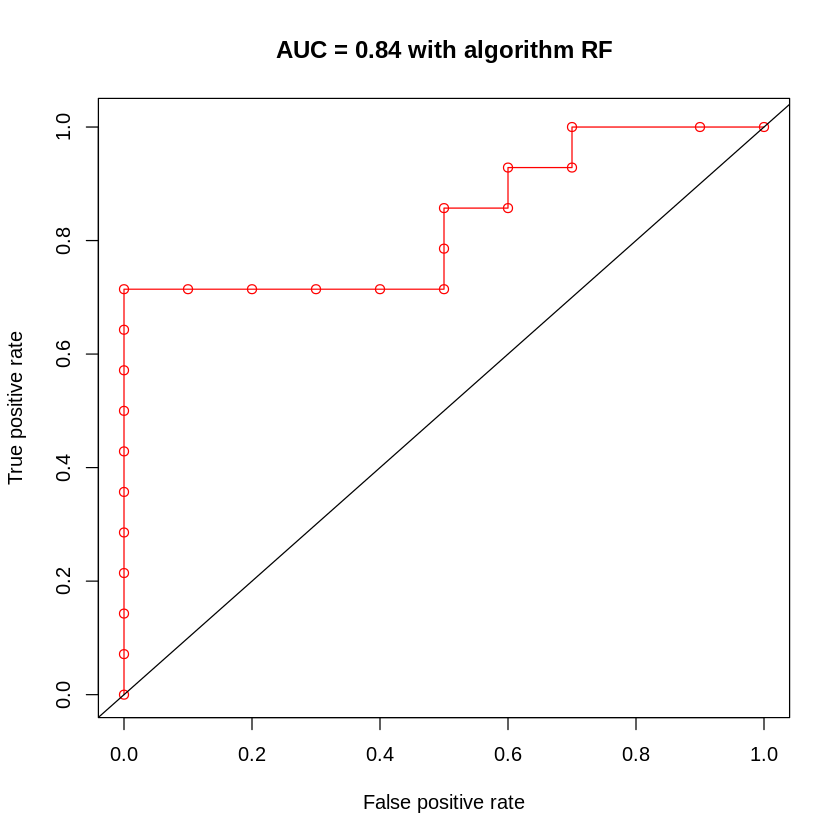

In [ ]:
# Repeat steps 14 through 22 for various K values.
# Verify the PCA and the comparison by Accuracy and Kappa, and predictions.

# Run the command to generate the data for the ROC curve and calculate the AUC.
predictionsKSroc<- predict( fit.rf.top, testingrank.top, type = "prob")[,2] #prob. clase=yes
predict.rocr  <- prediction(predictionsKSroc,testingrank.top$Class)
perf.rocr     <- performance(predict.rocr,"tpr","fpr") #True y False postivie.rate

auc <- as.numeric(performance(predict.rocr ,"auc")@y.values)
par(mfrow = c(1,1))
plot(perf.rocr,type='o', col = "red",main = paste('AUC =',round(auc,2),"with algorithm RF"), ylim=c(0,1.01),xlim=c(0,1))
abline(a=0, b=1)

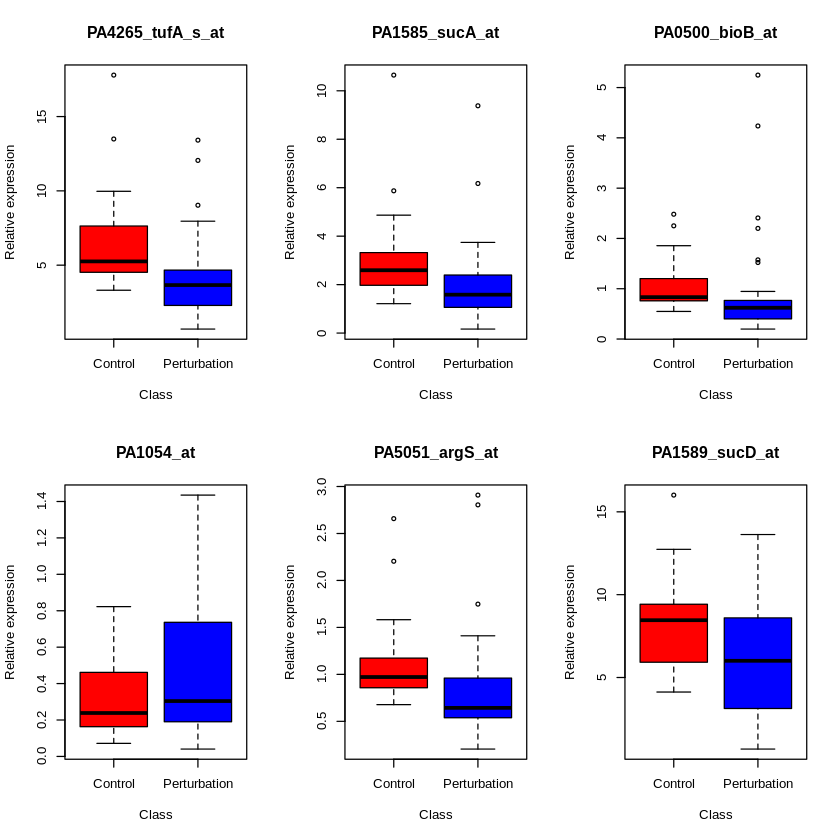

In [ ]:
# Explore the top6 values ​​with boxplot by class, with the following command:
par(mfrow=c(2,3))
for(i in 1:6) {
  boxplot(datosrank[,i] ~ datosrank$Class, main=names(datosrank)[i], xlab = "Class", ylab = "Relative expression", col = c("red","blue"))
}
par(mfrow=c(1,1))

# Integration

In the published study, additional analyses were conducted using different data partitioning strategies between training and testing sets, as well as repeated application of classification algorithms under those conditions. This approach led to a more robust selection of genes and enabled clustering algorithms to generate profiles with higher resolution.

In the case of the top K genes for a "single partition" based on the importance, the analysis are presented in the figure (example for RF): (A) Accuracy, F1, and kappa values after iterations of classification with the first top 200 genes (adding genes 1-to-1). (B) ROC plot using selected top 56 genes for evaluation of the performance of the algorithm. (C) Ranking and importance value of top 56 genes.

![pca.jpg](https://ars.els-cdn.com/content/image/1-s2.0-S0303264721000666-gr4.jpg)


Jointly with all the other stratagies with multiple partitions, the top 1% of the most important genes identified by each of the six final methods were considered for defining the "perturbome" set, resulting in 118 candidate genes. To validate this selection, functional enrichment analyses were performed, and the presence of selected genes across the different strategies was assessed, as shown in the following figure: (A) The top 56 genes of each algorithm were selected and compared using upset plots, showing the intersection of the lists among classifiers. This comparison resulted in 118 distinct candidate genes. A gene was selected in the final list if it was found at least by four different algorithms, i.e. the support was ≥4. (B) Gene annotation using KEGG shows the enriched pathways found for the core perturbome genes.

![pca.jpg](https://ars.els-cdn.com/content/image/1-s2.0-S0303264721000666-gr6.jpg)

The finally selected genes were those identified by at least 4 out of the 6 methods used, and they were included in the final "core perturbome" list, which ultimately consisted of 46 genes.

Additionally, a systems biology approach was used to analyze molecular interactions among the selected genes, leveraging data from molecular interaction databases. This confirmed that the selection was not random but biologically meaningful, with functions linked to stress tolerance, including DNA damage response, regulation of biomolecule metabolism, and modulation of RNA and protein pathways. In the figure for network analysis and comparison of global transcriptomic profiles using the 46 core perturbome genes. (A) Distribution and support (number of algorithms) of preliminary 118 selected genes on a basal large-scale network of functional associations in P. aeruginosa. Topological metrics of the network and identity of hub genes (circles with light-blue border) are included. (B) Small-world network showing relationships between the 46 core response genes and connectivity metric for each gene. (C) The global profile of samples by PCA, showing the separation of conditions.

![pca.jpg](https://ars.els-cdn.com/content/image/1-s2.0-S0303264721000666-gr7_lrg.jpg)

During the peer-review process of the scientific work for publication, a comparison with a differential gene expression analysis was requested. Thus, the analysis was implemented in R, using the same data comparing perturbed cases versus control conditions, considering gene with |logFC|>1 & *p-value* < 0.05 as differentialy expressed genes.

The resulting gene sets were analyzed through functional enrichment, following a similar approach to that used in the machine learning-based gene selection. The analysis revealed a strong similarity in the profiles of enriched metabolic and signal transduction pathways, associated with comparable biological functions, as shown in the following figure: (A) General annotation profile of identified genes by core response genes showing associated biological processes. (B) Comparison of identified genes by our machine learning approach and DEGs lists. (C) General annotation of DEGs showing a similar profile to our approach. This was considered additional validation of the gene selection obtained through classification algorithms.

![pca.jpg](https://ars.els-cdn.com/content/image/1-s2.0-S0303264721000666-gr8_lrg.jpg)

### Conclusions

Although this tutorial provides an introduction to classification algorithms, many studies have used this protocol as a foundational workflow. It has not only enabled the identification of molecular profiles under diverse conditions and predictors, but also supported feature selection, model re-evaluation, and prediction on instances not included in the training phase.

